# Mini Project 2 - David Wang

## Task 1

Let's compute an expression for the gradient $\nabla_{\textbf{w}} f(\textbf{x})$ $$f(\textbf{w}) = w_1 \phi(w_2x_1+w_3x_2+w_4x_3+w_5) + w_6 \phi(w_7x_1+w_8x_2+w_9x_3 + w_{10}) + w_{11} \phi(w_{12}x_1+w_{13}x_2+w_{14}x_3+w_{15}) + w_{16}$$
$$\nabla_{\textbf{w}} f(\textbf{x}) = \begin{bmatrix} \frac{\partial f}{\partial w_1} \\ \frac{\partial f}{\partial w_2} \\ \vdots \\ \frac{\partial f}{\partial w_{16}} \end{bmatrix} = \begin{bmatrix} \phi(w_2x_1+w_3x_2+w_4x_3+w_5) \\ w_1x_1\phi'(w_2x_1+w_3x_2+w_4x_3+w_5) \\ w_1x_2\phi'(w_2x_1+w_3x_2+w_4x_3+w_5) \\ w_1x_3\phi'(w_2x_1+w_3x_2+w_4x_3+w_5) \\ w_1\phi'(w_2x_1+w_3x_2+w_4x_3+w_5) \\ \phi(w_7x_1+w_8x_2+w_9x_3 + w_{10}) \\ w_6x_1\phi'(w_7x_1+w_8x_2+w_9x_3 + w_{10}) \\ w_6x_2\phi'(w_7x_1+w_8x_2+w_9x_3 + w_{10}) \\ w_6x_3\phi'(w_7x_1+w_8x_2+w_9x_3 + w_{10}) \\ w_6\phi'(w_7x_1+w_8x_2+w_9x_3 + w_{10}) \\ \phi(w_{12}x_1+w_{13}x_2+w_{14}x_3+w_{15}) \\ w_{11}x_1\phi'(w_{12}x_1+w_{13}x_2+w_{14}x_3+w_{15}) \\ w_{11}x_2\phi'(w_{12}x_1+w_{13}x_2+w_{14}x_3+w_{15}) \\ w_{11}x_3\phi'(w_{12}x_1+w_{13}x_2+w_{14}x_3+w_{15}) \\ w_{11}\phi'(w_{12}x_1+w_{13}x_2+w_{14}x_3+w_{15}) \\ 1 \end{bmatrix}$$ where $\phi(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ and $\phi'(x) = \frac{(e^x+e^{-x})(e^x + e^{-x}) - (e^x - e^{-x})(e^x - e^{-x})}{(e^x + e^{-x})^2} = 1-\phi^2(x)$.

## Task 2

Now we're going to compute the derivative matrix $\textbf{Dr}(\textbf{w})$
$$\textbf{r}(w)=\begin{bmatrix} r_1(w) \\ r_2(w) \\ \vdots \\ r_{N}(w) \end{bmatrix}$$ The derivative matrix is therefore $$\begin{bmatrix}
\nabla_{\textbf{w}} r_1(\textbf{w})^T \\
\nabla_{\textbf{w}} r_2(\textbf{w})^T \\
\vdots \\
\nabla_{\textbf{w}} r_{N}(\textbf{w})^T
\end{bmatrix}$$
Note that $$ r_n(\textbf{w}) = f_{\textbf{w}}(\textbf{x}^{(n)}) - y^{(n)} \qquad n = 1, 2, \dots, N$$
Since $y^{(n)}$ is a constant that doesn't depend on $\textbf{w}$, we can ignore it when computing the derivative matrix. Therefore, $$\textbf{Dr}(\textbf{w}) = \begin{bmatrix}
\nabla_{\textbf{w}} f_{\textbf{w}}(\textbf{x}^{(1)})^T \\
\nabla_{\textbf{w}} f_{\textbf{w}}(\textbf{x}^{(2)})^T \\
\vdots \\
\nabla_{\textbf{w}} f_{\textbf{w}}(\textbf{x}^{(N)})^T
\end{bmatrix}$$ with $\nabla_{\textbf{w}} f_{\textbf{w}}(\textbf{x}^{(n)})$ computed in Task 1.

## Task 3

### (a) First we'll write code implementing the Levenberg-Marquardt algorithm.

In [1]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The Levenberg-Marquardt algorithm is an iterative method for solving the nonlinear least squares problem. We first need to define the first order Taylor approximation of our function $\textbf{r}(\textbf{w})$ around the current estimate $\textbf{w}^{(k)}$ $$\textbf{r}(\textbf{w};\textbf{w}^{(k)}) = \textbf{r}(\textbf{w}^{(k)}) + \textbf{Dr}(\textbf{w}^{(k)})(\textbf{w} - \textbf{w}^{(k)})$$
 For each iteration, we want to choose $w^{(k+1)}$ such that it is a solution to the following:
    $$\min_{\textbf{w}}\Vert\textbf{r}(\textbf{w};\textbf{w}^{(k)})\Vert_2^2 + \lambda^{(k)}\Vert \textbf{w}-\textbf{w}^{(k)} \Vert$$
Substituting the first order Taylor approximation into the above expression, we get
$$\min_{\textbf{w}}\Vert\textbf{r}(\textbf{w}^{(k)}) + \textbf{Dr}(\textbf{w}^{(k)})(\textbf{w} - \textbf{w}^{(k)})\Vert_2^2 + \lambda^{(k)}\Vert \textbf{w}-\textbf{w}^{(k)} \Vert = \min_{\textbf{w}}\Vert\textbf{Dr}(\textbf{w}^{(k)})\textbf{w} - (\textbf{Dr}(\textbf{w}^{(k)})\textbf{w}^{(k)} - \textbf{r}(\textbf{w}^{(k)}))\Vert_2^2 + \Vert \sqrt{\lambda^{(k)}}\textbf{w}-\sqrt{\lambda^{(k)}}\textbf{w}^{(k)} \Vert_2^2$$
This minimization problem is now in the form of a multi-objective least squares problem. By stacking, we can rewrite the above expression as:
$$\min_{\textbf{w}}\left\Vert\begin{bmatrix} \textbf{Dr}(\textbf{w}^{(k)}) \\ \sqrt{\lambda^{(k)}}\textbf{I} \end{bmatrix}\textbf{w} - \begin{bmatrix} \textbf{Dr}(\textbf{w}^{(k)})\textbf{w}^{(k)} - \textbf{r}(\textbf{w}^{(k)}) \\ \sqrt{\lambda^{(k)}}\textbf{w}^{(k)} \end{bmatrix}\right\Vert_2^2$$
Applying the normal equation, we get:
$$\textbf{w}^{(k+1)} = \textbf{w}^{(k)} - \left(\textbf{Dr}(\textbf{w}^{(k)})^T\textbf{Dr}(\textbf{w}^{(k)}) + \lambda^{(k)}\textbf{I}\right)^{-1}\textbf{Dr}(\textbf{w}^{(k)})^T\textbf{r}(\textbf{w}^{(k)})$$
Then, we check if $\Vert\textbf{r}(\textbf{w}^{(k+1)})\Vert_2^2 < \Vert\textbf{r}(\textbf{w}^{(k)})\Vert_2^2$. If so, we scale $\lambda^{(k)}$ by $0.8$ and set $\textbf{w}^{(k)} = \textbf{w}^{(k+1)}$. Otherwise, we increase $\lambda^{(k)}$ by a factor of $2$ and do not update $\textbf{w}^{(k)}$. We repeat this process until $\Vert\textbf{r}(\textbf{w}^{(k + 1)})\Vert_2^2 < 10^{-2}$ (ie: the **stopping condition** used is the small residual criterion). We will also set a maximum number of iterations to prevent laptop explosions ($300$).

In [2]:
# our nonlinear function
def g(x):
    return x[0]*x[1] + x[2]

# hyperbolic tangent function
def phi(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def phi_prime(x):
    return 1 - phi(x)**2

def r(x, y, w):
    vector = np.array([])
    for i in range(len(x)):
        vector = np.append(vector, w[0] * phi(w[1:4] @ x[i] + w[4]) + w[5] * phi(w[6:9] @ x[i] + w[9]) + w[10] * phi(w[11:14] @ x[i] + w[14]) + w[15] - y[i])
    return vector

def training_loss(x, y, w, lam):
    return np.inner(r(x, y, w), r(x, y, w)) + lam * np.inner(w, w)

# identity matrix for future use
I = np.identity(16)

In [3]:
# helper functions to compute Dr
def gradient(x, w):
    return np.array([phi(w[1]*x[0] + w[2]*x[1] + w[3]*x[2] + w[4]), 
        w[0]*x[0]*phi_prime(w[1]*x[0] + w[2]*x[1] + w[3]*x[2] + w[4]), 
        w[0]*x[1]*phi_prime(w[1]*x[0] + w[2]*x[1] + w[3]*x[2] + w[4]), 
        w[0]*x[2]*phi_prime(w[1]*x[0] + w[2]*x[1] + w[3]*x[2] + w[4]), 
        w[0]*phi_prime(w[1]*x[0] + w[2]*x[1] + w[3]*x[2] + w[4]),
        phi(w[6]*x[0] + w[7]*x[1] + w[8]*x[2] + w[9]),
        w[5]*x[0]*phi_prime(w[6]*x[0] + w[7]*x[1] + w[8]*x[2] + w[9]),
        w[5]*x[1]*phi_prime(w[6]*x[0] + w[7]*x[1] + w[8]*x[2] + w[9]),
        w[5]*x[2]*phi_prime(w[6]*x[0] + w[7]*x[1] + w[8]*x[2] + w[9]),
        w[5]*phi_prime(w[6]*x[0] + w[7]*x[1] + w[8]*x[2] + w[9]),
        phi(w[11]*x[0] + w[12]*x[1] + w[13]*x[2] + w[14]),
        w[10]*x[0]*phi_prime(w[11]*x[0] + w[12]*x[1] + w[13]*x[2] + w[14]),
        w[10]*x[1]*phi_prime(w[11]*x[0] + w[12]*x[1] + w[13]*x[2] + w[14]),
        w[10]*x[2]*phi_prime(w[11]*x[0] + w[12]*x[1] + w[13]*x[2] + w[14]),
        w[10]*phi_prime(w[11]*x[0] + w[12]*x[1] + w[13]*x[2] + w[14]),
        1])

def jacobian(x, w):
    matrix = gradient(x[0], w)
    for i in range(1, len(x)):
        matrix = np.vstack((matrix, gradient(x[i], w)))
    return matrix

In [4]:
# levenberg-marquardt algorithm
# inputs: x and y pairs, lambda, initial w vector, max number of iterations
# output: optimal w vector

def levenberg_marquardt(x, y, lam, w0, k_max):
    # initialize
    w = w0
    
    loss = np.array([])
    
    # iterate until stopping criterion is met
    iteration = 0
    while True:
        
        function = r(x, y, w)
        
        # compute Dr(w)
        Dr = jacobian(x, w)

        w_next = w - (np.linalg.inv(Dr.T @ Dr + lam * I) @ Dr.T @ function)
        
        # check tentative iterate
        function_next = r(x, y, w_next)
        if np.inner(function_next, function_next) < np.inner(function, function):
            lam = 0.8 * lam
            w = w_next
            function = function_next
        else:
            lam = 2 * lam
        
        # training loss
        loss = np.append(loss, training_loss(x, y, w, lam))
        # stopping criterion
        small_residual = np.inner(function, function)
        
        if small_residual < 10**-2 or iteration > k_max:
            return w, loss
        iteration += 1

### Training our algorithm

In [11]:
# generate training data
np.random.seed(2023)
def generate_training_data(gamma, function):
    x = np.random.rand(500, 3) * 2 * gamma - gamma
    y = np.array([])
    for i in range(len(x)):
        y = np.append(y, function(x[i]))
    return x, y
x, y = generate_training_data(1, g)

In [12]:
# initialize w between -1 and 1
w0 = np.random.rand(16) * 2 - 1

#### Trying different initializations of $\textbf{w}$ and different values of $\lambda$
For each initialization, we will analyze the different values of $\lambda$, but they will be plotted on the same graph for easier comparison.

In [6]:
# define a function for training with different initializations of w
def train_w(w0):
    lam = 10**-5
    w_array = np.array([])
    for i in range(5):
        w, loss = levenberg_marquardt(x, y, lam, w0, 300)
        plt.plot(loss, label="$\lambda$ = " + str(lam))
        plt.legend(loc="upper right")
        lam *= 10
        w_array = np.append(w_array, w)
    plt.title("Training Loss vs. Iteration for varying $\lambda$")
    plt.xlabel("Iteration")
    plt.ylabel("Training Loss")
    plt.show()
    return w_array

##### $\textbf{w}$ between $-1$ and $1$ (aka our original initialization)

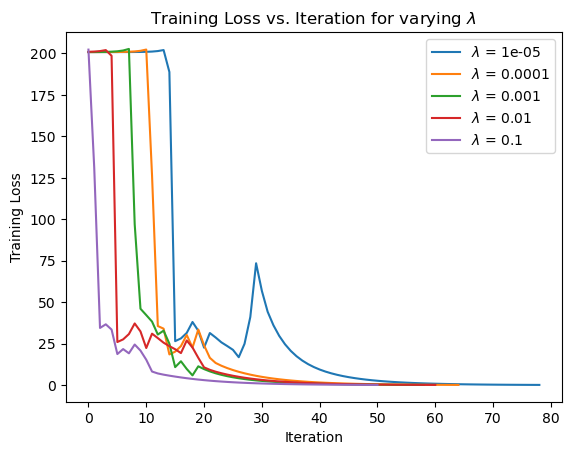

In [13]:
w_og = train_w(w0)

This starting value of $\textbf{w}$ appears to minimize training loss pretty well for all values of $\lambda$ tested. They all stopped before the max iterations was reached and converged to a training loss close to $0$. $\lambda = 10^{-5}$ did have a large spike around 30 iterations, but it died right back down.

##### $\textbf{w}$ between $-5$ and $5$

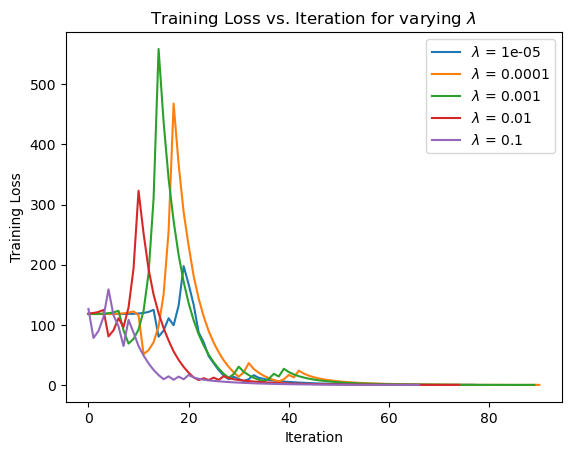

In [17]:
w0 = np.random.rand(16) * 10 - 5
w_5 = train_w(w0)

This starting value of $\textbf{w}$ with much higher variance still appears to train well for the values of $\lambda$ tested. Interestingly, $\lambda = 0.0001, 0.001, 0.01$ had large spikes in the earlier iterations, but all values still converged in about 70 iterations.

##### $\textbf{w}$ all same value ($-2$)

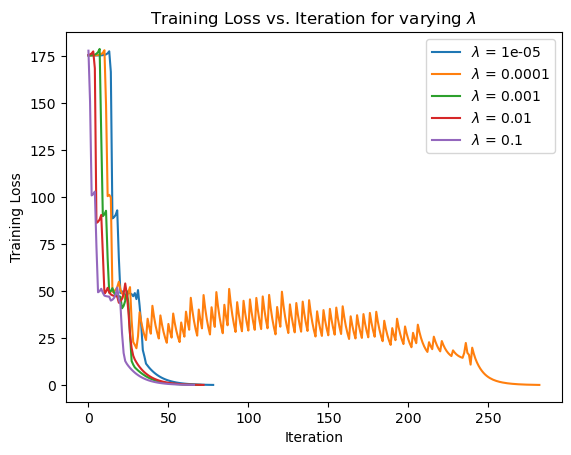

In [18]:
w0 = np.zeros(16) - 2
w_same = train_w(w0)

This starting value of $\textbf{w}$ appears to help training loss decrease decently well for all values of $\lambda$ tested. However, it is worth nothing that the training loss oscillates somewhat wildly for $\lambda = 0.0001$ between $50$ and $200$ iterations, but it converges back down before max iterations are reached.

### (b) Now we'll test our model with $N = 100$ test data points.

In [7]:
# generate test data with gamma as magnitude bound
def generate_test_data(gamma, function):
    x_test = np.random.rand(100, 3) * 2 * gamma - gamma
    y_test = np.array([])
    for i in range(len(x_test)):
        y_test = np.append(y_test, function(x_test[i]))
    return x_test, y_test

#### Metric for testing error
We need a way to quantify the testing error of our model. We will use the following metric:
$$\frac{1}{N}\sum_{n=1}^{N}\left(f_{\textbf{w}}(\textbf{x}^{(n)}) - y^{(n)}\right)^2$$
where $N$ is the number of test data points and $(x^{(n)}, y^{(n)})$ is a single data point. This will give us the average squared error for each data point. Note that this is equivalent to:
$$\frac{1}{N}\Vert\textbf{r}(\textbf{w})\Vert_2^2$$
where $\textbf{r}(\textbf{w})$ is defined above, but using the test data instead of training data.

In [8]:
# testing error
def test_error(x, y, w):
    return np.inner(r(x, y, w), r(x, y, w))/len(x)

In [9]:
# testing error for different initializations of w, different lambdas, and different gammas
def test(gamma, function): 
    # generate test data
    x_test, y_test = generate_test_data(gamma, function)
    # 3 rows for different initializations of w and 7 columns for different lambdas
    matrix = np.zeros((3, 5))
    
    # original initialization
    for i in range(5):
        # get w and error for specifc lambda
        error = test_error(x_test, y_test, w_og[i*16:(i+1)*16])
        matrix[0][i] = error
        
    # 0 to 10 initialization
    for i in range(5):
        # get w and error for specifc lambda
        error = test_error(x_test, y_test, w_5[i*16:(i+1)*16])
        matrix[1][i] = error
    
    # same value initialization
    for i in range(5):
        # get w and error for specifc lambda
        error = test_error(x_test, y_test, w_same[i*16:(i+1)*16])
        matrix[2][i] = error
    
    # create dataframe with results
    df = pd.DataFrame(matrix, columns=[10**(i) for i in range(-5, 0)], index=["-1 to 1", "-5 to 5", "Same Value (-2)"])
    return df

#### Testing with $\Gamma_T = 1$

In [19]:
np.random.seed(174)
df = test(1, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.000021,0.000020,0.000020,0.000020,0.000020
-5 to 5,0.000023,0.000018,0.000016,0.000017,0.000021
Same Value (-2),0.000031,0.000026,0.000031,0.000031,0.000031


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 2$

In [158]:
df = test(2, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.018955,0.018367,0.018173,0.018367,0.017984
-5 to 5,0.021382,0.019748,0.021612,0.019960,0.021611
Same Value (-2),0.019961,0.018301,0.019748,0.019961,0.019748


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 5$

In [159]:
df = test(5, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,14.480674,14.185584,14.087444,14.185558,13.990851
-5 to 5,11.806708,11.254895,11.882277,11.328289,11.882127
Same Value (-2),11.328548,17.053701,11.255062,11.328516,11.255004


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 0.5$

In [160]:
df = test(0.5, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.000005,0.000005,0.000005,0.000005,0.000005
-5 to 5,0.000005,0.000004,0.000005,0.000004,0.000005
Same Value (-2),0.000004,0.000005,0.000004,0.000004,0.000004


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 0.1$

In [161]:
df = test(0.1, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,3.968573e-07,3.920655e-07,3.896427e-07,3.903880e-07,3.875940e-07
-5 to 5,2.959845e-07,2.639039e-07,3.008969e-07,2.680387e-07,3.007204e-07
Same Value (-2),2.678308e-07,1.109029e-06,2.637037e-07,2.678254e-07,2.637033e-07


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

---
#### Comments on training and testing results
From the training results, we can see that as iterations increase, the training loss decreases exponentially. Generally, the starting value of $\lambda$ does not matter that much since the training loss converges to a similar value. However, the initialization of of $\textbf{w}_0$ does matter. Larger variance in $\textbf{w}_0$ lead some values of $\lambda$ (such as $\lambda = 10^{-4}, 10^{-3}, 10^{-2}$ when $\textbf{w}_0$ was between $-5$ and $5$ to spike during earlier iterations but they all eventually converged to a similar value.

From the testing results, we can see that the testing error is generally higher when $\Gamma_T$ is larger. This makes sense because the larger $\Gamma_T$ is, the more likely it is that the test data will be outside the range of the training data. On the other hand, the smaller $\Gamma_T$ is, the smaller the testing error. Again, varying the starting value of $\lambda$ does not seem to have a significant effect on the testing error. Varying the starting value of $\textbf{w}_0$ also does not lead to a noticeable difference in testing error.

### (c) Now we'll repeat the above experiments with a new nonlinear function $g_2(x) = x_1 + {e^{x_2 + x_3}}$
Here's how we're going to reuse code from above: Everything we need is already defined in functions, from training to testing. The only thing the new non-linear function changes is our data points, for which we have a function to generate them. We will also need to define a new function for $g_2(x)$. Everything else that depends on these data points, such as the residual and Jacobian, will be automatically taken care of by the functions we defined above.

In [100]:
def g2(x):
    return x[0] + np.exp(x[1] + x[2])

#### First, let's train

In [101]:
# generate training data
np.random.seed(123)
x, y = generate_training_data(1, g2)

### Training with different values of $\textbf{w}_0$, $\lambda$ and plotting results

#### $\textbf{w}_0$ between $-1$ and $1$

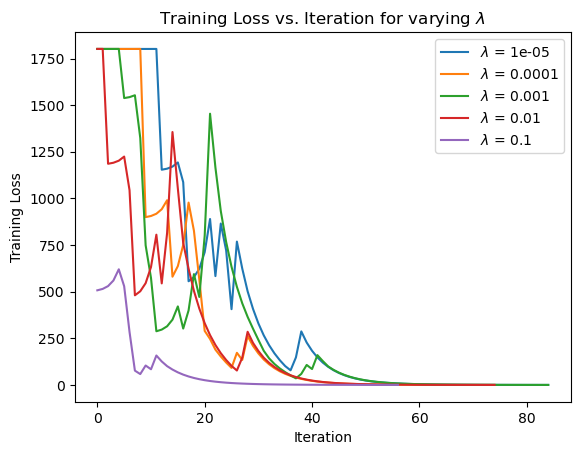

In [102]:
w0 = np.random.rand(16) * 2 - 1
w_og = train_w(w0)

This starting value of $\textbf{w}$ appears to minimize training loss pretty well for all values of $\lambda$ tested. Again, there is a spike at around 20 iterations for $\lambda = 10^{-4}$ but it does not seem to affect convergence.

#### $\textbf{w}_0$ between $-5$ and $5$

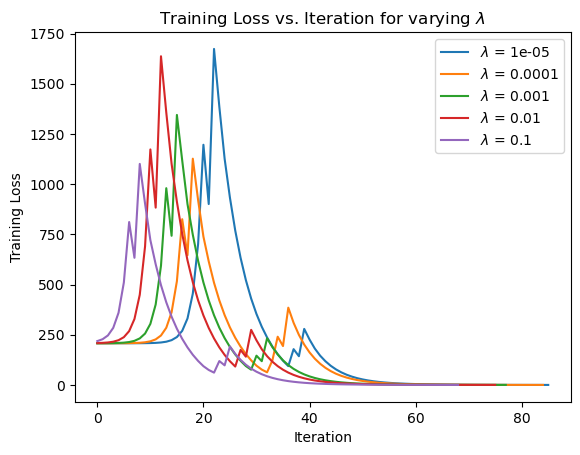

In [103]:
w_0 = np.random.rand(16) * 10 - 5
w_5 = train_w(w_0)

While all values of $\lambda$ converge for this initialization, all $\lambda$ values first rapidly increase in training loss before converging down in about 80 iterations.

#### $\textbf{w}_0$ all same value ($-2$)


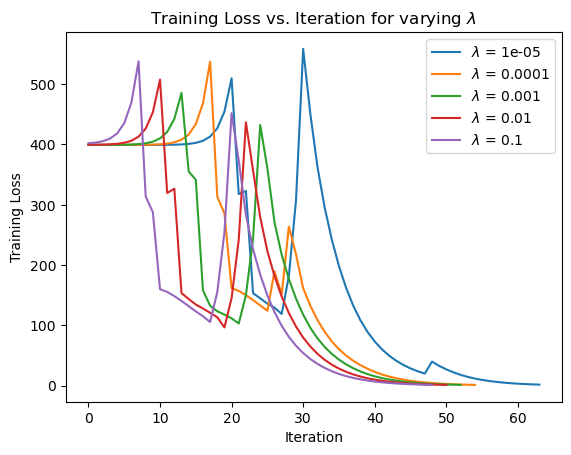

In [104]:
w_0 = np.zeros(16) - 2
w_same = train_w(w_0)

For this initialization of $\textbf{w}_0$, $\lambda = 10^{-5}$ takes noticably longer than the other values to converge, but it is nothing significant.

### Testing with $N=100$ data points
The same metric for testing error will be used

#### Testing with $\Gamma_T = 1$

In [105]:
df = test(1, g2)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.000014,0.000013,0.000014,0.000013,0.000013
-5 to 5,0.000014,0.000014,0.000014,0.000014,0.000013
Same Value (-2),0.000015,0.000015,0.000015,0.000015,0.000015


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.


#### Testing with $\Gamma_T = 2$

In [119]:
df = test(2, g2)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.388652,0.379781,0.396636,0.385314,0.368727
-5 to 5,0.401912,0.364884,0.397479,0.398110,0.428635
Same Value (-2),4.187120,4.449875,4.385125,4.421098,4.333303


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 5$

In [113]:
df = test(5, g2)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,2.503844e+06,2.503485e+06,2.504022e+06,2.503678e+06,2.502910e+06
-5 to 5,2.504391e+06,2.502743e+06,2.504216e+06,2.504230e+06,2.505454e+06
Same Value (-2),2.529233e+06,2.529495e+06,2.529438e+06,2.529481e+06,2.529390e+06


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 0.5$

In [114]:
df = test(0.5, g2)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.000009,0.000009,0.000009,0.000009,0.000009
-5 to 5,0.000009,0.000009,0.000009,0.000009,0.000010
Same Value (-2),0.000009,0.000008,0.000008,0.000008,0.000008


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 0.1$

In [115]:
df = test(0.1, g2)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.000007,0.000007,0.000007,0.000007,0.000007
-5 to 5,0.000012,0.000012,0.000011,0.000012,0.000009
Same Value (-2),0.000001,0.000002,0.000002,0.000002,0.000002


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

---
#### Comments on training and testing results
From the training results, we can see that as iterations increase, the training loss decreases exponentially (ignoring the spiking behavior at the beginning). They all converge to avalue that is very close th $0$, which is good training performance. Generally, the starting value of $\lambda$ does not matter that much since the training loss converges to a similar value. Different initalizations of $\textbf{w}_0$ do not seem to have a significant effect on training loss. An interesting observation is that the first non-linear function was much more uniform for different values of $\lambda$ (barring one or two outliers). The behavior of the second non-linear function is much more erratic.

From the testing results, we can see that this function is a lot more sensitive to the magnitude of $\Gamma_T$. The larger $\Gamma_T$ is, the larger the testing error, but to a much higher degree than the first non-linear function. In testing, the value of $\lambda$ does not seem to have a significant effect on testing error. Different initalizations of $\textbf{w}_0$ only had an impact for $\Gamma_T = 2$, where the initalization of $\textbf{w}_0 = \textbf{-2}$ had a much higher testing error than the other two initializations. 

### (d) Now we'll repeat the above experiments using noisy data
We will use the same functions as above, but we will need to define a new function for generating noisy data as follows: $$y^{(n)} = x_1^{(n)}x_2^{(n)} + x_3^{(n)} + e^{(n)}$$ where $|e| \leq \epsilon$. We will experiment with 3 different values of $\epsilon$: $0.01, 0.1, 0.2$.

In [133]:
# Function for generating noisy data
def generate_noisy_data(gamma, function, noise):
    x = np.random.rand(500, 3) * 2 * gamma - gamma
    y = np.array([])
    for i in range(len(x)):
        y = np.append(y, function(x[i]) + np.random.rand() * 2 * noise - noise)
    return x, y

#### $\epsilon = 0.01$

#### Training

In [149]:
x, y = generate_noisy_data(1, g, 0.01)

### $\textbf{w}_0$ between $-1$ and $1$

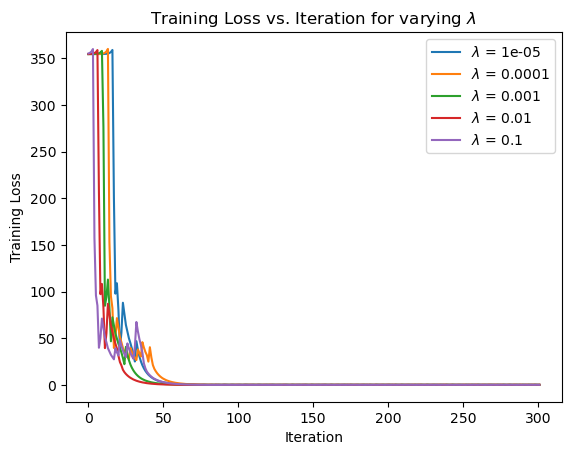

In [177]:
w0 = np.random.rand(16) * 2 - 1
w_og = train_w(w0)

All values of $\lambda$ converge in training loss to a small value, but do not reach the stopping criterion before max iterations.

### $\textbf{w}_0$ between $-5$ and $5$

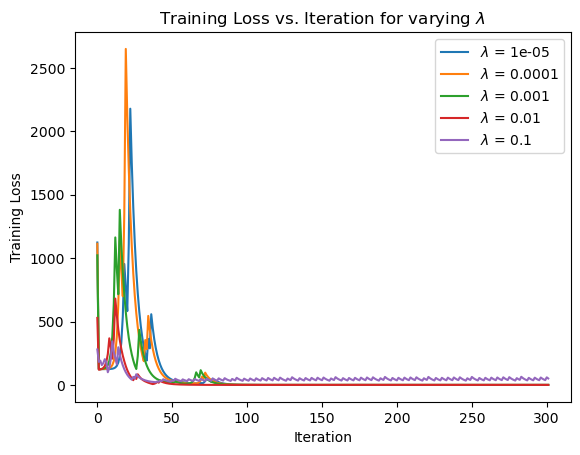

In [137]:
w0 = np.random.rand(16) * 10 - 5
w_5 = train_w(w0)

There is significant spiking in the beginning for all $\lambda$ values besides $0.1$ but that training loss seems to oscillate at a constant value higher than the others.

### $\textbf{w}_0$ same value ($-2$)

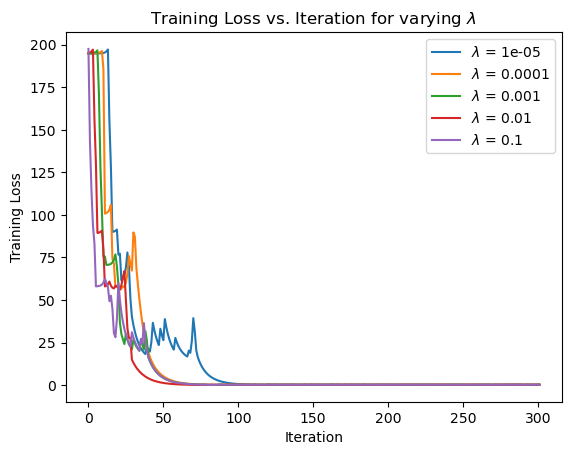

In [175]:
w0 = np.zeros(16) - 2
w_same = train_w(w0)

This initialization seems to have reached some type of convergence, but according to the graph, they did not reach the stopping criterion before reaching max iterations.

### Testing with $N=100$ data points
The same testing metric will be used

#### Testing with $\Gamma_T = 1$

In [178]:
df = test(1, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.000003,0.000003,0.000003,0.000003,0.000003
-5 to 5,0.000116,0.000115,0.000116,0.000115,0.000116
Same Value (-2),0.000005,0.000005,0.000004,0.000005,0.000005


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 2$

In [179]:
df = test(2, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.001458,0.000779,0.001420,0.001388,0.000763
-5 to 5,0.038455,0.038411,0.038385,0.038350,0.038327
Same Value (-2),0.001794,0.001490,0.001579,0.001431,0.001479


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 5$

In [180]:
df = test(5, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,2.461680,2.297548,2.402388,2.350993,2.252782
-5 to 5,22.091592,22.056220,22.044572,22.015736,22.004961
Same Value (-2),2.587878,2.745875,2.301059,2.640593,2.728875


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 0.5$

In [181]:
df = test(0.5, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,6.667103e-07,5.196625e-07,6.438669e-07,6.428869e-07,4.967434e-07
-5 to 5,4.690585e-05,4.698996e-05,4.679927e-05,4.687814e-05,4.671099e-05
Same Value (-2),1.089624e-06,1.141737e-06,9.818442e-07,1.097354e-06,1.126330e-06


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 0.1$

In [182]:
df = test(0.1, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,7.581701e-08,2.252177e-08,6.781328e-08,8.279783e-08,2.783243e-08
-5 to 5,1.848889e-05,1.960370e-05,1.849163e-05,1.948207e-05,1.850173e-05
Same Value (-2),1.180808e-07,6.835833e-08,1.196625e-07,6.697368e-08,7.177289e-08


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### $\epsilon = 0.1$

#### Training

In [183]:
x, y = generate_noisy_data(1, g, 0.1)

### $\textbf{w}_0$ between $-1$ and $1$

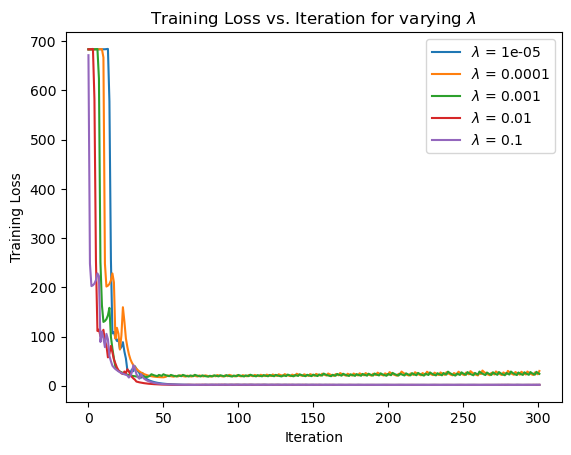

In [185]:
w0 = np.random.rand(16) * 2 - 1
w_og = train_w(w0)

This initalization converged very uniformly for all different values of $\lambda$ at the beginning, but some values of $\lambda$ oscillate at a higher value and don't converge properly.

### $\textbf{w}_0$ between $-5$ and $5$

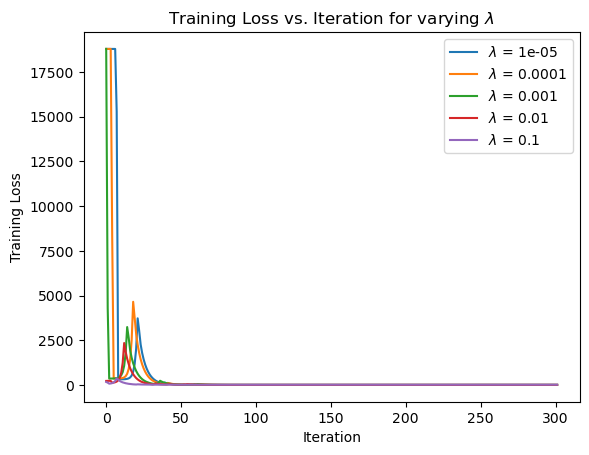

In [186]:
w0 = np.random.rand(16) * 10 - 5
w_5 = train_w(w0)

This initalization converged somewhat uniformly for all different values of $\lambda$, but the stopping criterion was not met before max iterations.

### $\textbf{w}_0 = \textbf{-2}$

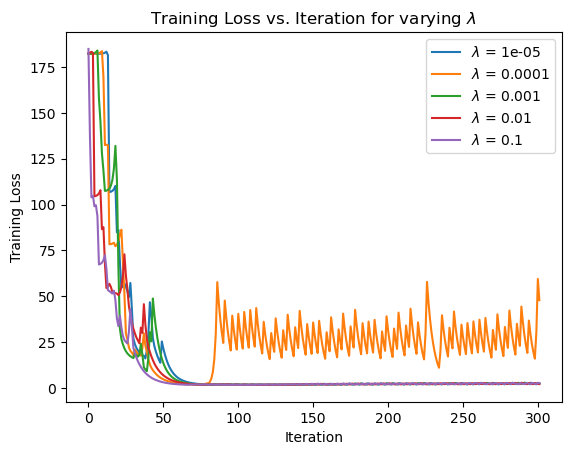

In [187]:
w0 = np.zeros(16) - 2
w_same = train_w(w0)

This initialization performed well for all values except $\lambda = 0.0001$, where it oscillated between a training loss of $25$ and $50$ before being cut off by the max iterations

### Testing with $N=100$ data points
The same testing metric will be used

#### Testing with $\Gamma_T = 1$

In [189]:
df = test(1, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.000050,0.031709,0.031937,0.000050,0.000050
-5 to 5,0.000112,0.000110,0.000112,0.000111,0.023139
Same Value (-2),0.000112,0.000045,0.000113,0.000112,0.000113


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 2$

In [190]:
df = test(2, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.005399,1.385909,1.386178,0.005361,0.005379
-5 to 5,0.093974,0.093352,0.093621,0.094171,0.700277
Same Value (-2),0.095129,0.037604,0.095617,0.095861,0.096894


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 5$    

In [192]:
df = test(5, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,6.429983,73.564018,73.569704,6.267521,6.340398
-5 to 5,70.023817,69.493855,69.668955,70.316900,80.514070
Same Value (-2),71.243160,39.262786,71.768056,72.117969,73.199826


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}$.

#### Testing with $\Gamma_T = 0.5$  

In [194]:
df = test(0.5, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.000010,0.040392,0.040368,0.000010,0.000010
-5 to 5,0.000025,0.000024,0.000025,0.000024,0.033395
Same Value (-2),0.000025,0.000011,0.000025,0.000025,0.000025


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}_0$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}_0$.

#### Testing with $\Gamma_T = 0.1$

In [196]:
df = test(0.1, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.000004,0.086567,0.086371,0.000005,0.000004
-5 to 5,0.000026,0.000023,0.000026,0.000024,0.089325
Same Value (-2),0.000026,0.000004,0.000026,0.000025,0.000027


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}_0$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}_0$.

#### $\epsilon = 0.2$

In [197]:
x, y = generate_noisy_data(1, g, 0.2)

#### Training

### $\textbf{w}_0$ between $-1$ and $1$

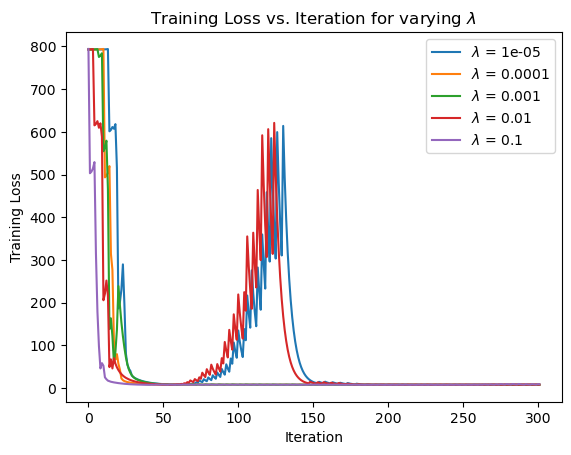

In [198]:
w0 = np.random.rand(16) * 2 - 1
w_og = train_w(w0)

For $\lambda = 10^{-5}, 0.01$, the training loss spikes at around $100$ iterations but dies back down. However, the stopping criterion is not reached before max iterations.

### $\textbf{w}_0$ between $-5$ and $5$

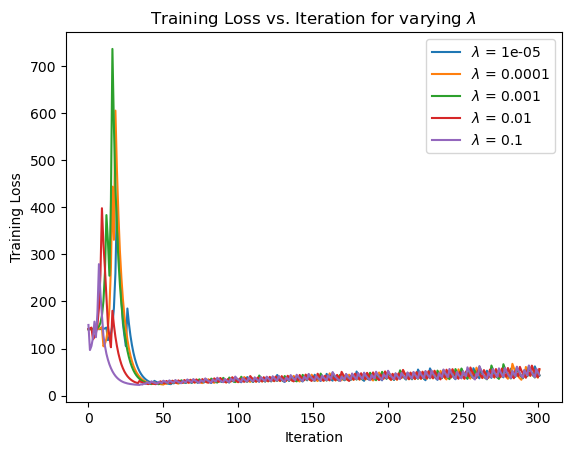

In [199]:
w0 = np.random.rand(16) * 10 - 5
w_5 = train_w(w0)

The training loss seems to diverge at a slow rate for all values of $\lambda$

### $\textbf{w}_0 = \textbf{-2}$

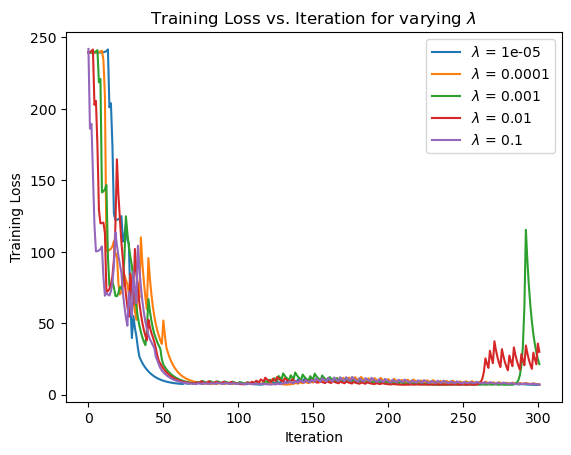

In [208]:
w0 = np.zeros(16) - 2
w_same = train_w(w0)

This initialization converged for all values of $\lambda$ except $0.001, 0.01$, which spiked up at the end of the $300$ max iterations

### Testing with $N=100$ data points
The same testing metric will be used

#### Testing with $\Gamma_T=1$

In [210]:
df = test(1, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.000536,0.000553,0.000613,0.000536,0.000555
-5 to 5,0.027701,0.027705,0.027670,0.027673,0.027679
Same Value (-2),0.000395,0.000402,0.000380,0.000380,0.000400


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}_0$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}_0$.

#### Testing with $\Gamma_T=2$

In [211]:
df = test(2, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.052068,0.058307,0.161923,0.052354,0.058832
-5 to 5,1.011824,1.011790,1.011952,1.011912,1.011794
Same Value (-2),0.044801,0.046471,0.076218,0.076150,0.045951


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}_0$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}_0$.

#### Testing with $\Gamma_T=5$ 

In [212]:
df = test(5, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,18.951116,17.781847,66.789182,18.707470,17.862830
-5 to 5,97.152933,97.155825,97.155143,97.154934,97.163843
Same Value (-2),52.377060,52.982545,54.147052,54.197429,52.796995


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}_0$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}_0$.

#### Testing with $\Gamma_T=0.5$

In [213]:
df = test(0.5, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.000270,0.000318,0.000116,0.000272,0.000322
-5 to 5,0.043349,0.043349,0.043347,0.043351,0.043355
Same Value (-2),0.000069,0.000071,0.000077,0.000077,0.000070


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}_0$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}_0$.

#### Testing with $\Gamma_T=0.1$

In [215]:
df = test(0.1, g)
df

,0.00001,0.00010,0.00100,0.01000,0.10000
-1 to 1,0.000013,0.000017,0.000078,0.000013,0.000017
-5 to 5,0.075220,0.075184,0.075426,0.075389,0.075336
Same Value (-2),0.000025,0.000026,0.000028,0.000029,0.000026


In the table above, the column labels are the different values of $\lambda$ tested, and the row labels are the different initializations of $\textbf{w}_0$ tested. The values in the table are the testing errors for each combination of $\lambda$ and $\textbf{w}_0$.

## Observations

Increasing the noise level definitely has an impact on my training loss. The functions are less likely to converge, and they are more likely to spike up at some point during training. However, the testing error is mostly similar to the testing error for the non-noisy data. The only exception is when $\Gamma_T$ is big, in which case the testing error is higher for noisier training data. With these metrics, it's difficult to see how effective introducing noise is in preventing overfitting for this particular circumstance, but it is definitely interesting how a increase in training loss does not necessarily lead to an increase in testing error for noisy training data.